# Problem Definition
## Latar Belakang
   perbankan sedang mengalami kesulitan memilih target nasabah untuk meningkatkan peluang penjualan produknya secara maksimal.Untuk menjawab hal ini, untuk itu diperlukan menganalisis berdasarkan data kampanye pemasaran terakhir yang dilakukan bank dan mengidentifikasi pola yang akan membantu bank dalam menemukan kesimpulan untuk mengembangkan strategi masa depan
## Tujuan Penelitian
   Mengembangkan model machine learning yang mampu memprediksi apakah nasabah akan membeli produk atau tidak
## Rumusan Masalah
1. Bagaimana memprediksi target pelanggan berdasarkan deposit?
2. Bagaimana mengembangkan model untuk memprediksi target pelanggan yan efektif dan efisien berdasarkan deposit?
## Data yang akan dipakai
   Data yang digunakan segmentasi customer bank di kaggle.Sumber data :Bank Marketing Dataset"https://www.kaggle.com/datasets/janiobachmann/bank-marketing-dataset". Deskripsi data segmentasi customer bank adalah sebagsi berikut :
   1. Age (Usia): Usia nasabah.
   2. Job (Pekerjaan): Pekerjaan yang dilakukan oleh nasabah.
   3. Marital (Status Pernikahan): Apakah nasabah menikah atau tidak.
   4. Education (Pendidikan): Tingkat pendidikan yang telah diselesaikan..
   5. Default: Apakah nasabah masuk dalam daftar default atau tidak.
   6. Balance (Saldo): Sisa saldo di rekening nasabah.
   7. Housing (Hunian): Informasi tentang hunian nasabah.
   8. Loan (Pinjaman): Apakah nasabah memiliki pinjaman sebelumnya atau tidak.
   9. Contact (Kontak): Sumber informasi ini.
   10.Day (Tanggal): Tanggal hari ini.
   11. Month (Bulan): Bulan.
   12. Duration (Durasi): Jumlah hari sejak terakhir kali nasabah dihubungi.
   13. Campaign (Kampanye Pemasaran): Kampanye pemasaran yang sedang berlangsung.
   14. Pdays: Jumlah hari yang berlalu setelah klien terakhir kali dihubungi.
   15. Previous (Respon Sebelumnya): Respon sebelumnya dari nasabah.
   16. Poutcome (Hasil Kampanye Sebelumnya): Hasil dari kampanye pemasaran sebelumnya.
   17. deposit(Tabungan): Ya atau tidak (variabel target).
(tulis nama, sumber data, dan deskripsi data di sini)
## Metode
Metode yang digunakan untuk menyelesaikan masalah ini adalah metode supervised learning dengan jenis label klasifikasi. Dengan menggunakan pemodelan   randomforest,svm,Logic regression  dan naive bayes, KNN,ACROS.
Langkah-langkah yang akan diambil meliputi:
1. Persiapan data: Mengimpor dataset
2. Mengeksplore data: menglihat data, menangani missing values, melakukan visualisasi data.
3. Mengcleaning data: Membersihkan data yang tidak diperlukan, mengubah data yang tidak valid menjadi valid
4. Pelatihan model: Melatih model menggunakan data train dan testing.
5. Evaluasi model: Mengevaluasi kinerja model menggunakan metrik evaluasi yang relavan
6. model selection: Mengoptimalkan model dan melakukan penyetelan hyperparameter jika diperlukan untuk meningkatkan kinerja.
7. inclusion :Membuat kesimpulan hasil akhir data semua proses yang sudah dilakukan


# Preparation | Persiapan
## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


## Get Data | Mendapatkan Data

In [3]:
#mendapatkan data dari file csv
df=pd.read_csv('dataset/bank.csv')

## Explore Data (EDA) | Eksplorasi Data

In [4]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [5]:
#menampilkan 5 data pertama
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [6]:
#menampilkan 5 data terakhir
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [8]:
#digunakan untuk menampilkan dimensi dataframe
df.shape

(11162, 17)

In [9]:
#digunakan untuk menampilkan data duplikat
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
11157    False
11158    False
11159    False
11160    False
11161    False
Length: 11162, dtype: bool

In [10]:
#digunakan untuk menghitung jumlah data duplikat
df.duplicated().sum()

0

In [11]:
#mengembalikan objek dataframe dengan nilai bool
df.isna()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11158,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11159,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11160,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
#digunakan untuk menampilkan kolom
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [13]:
#digunakan untuk menampilkan data yang null
df.isnull()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11158,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11159,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11160,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [15]:

df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


**Visualisasi JOB**


Menghitung jumlah nasabah yang dapat ditawarkan produk berdasarkan status pekerjaan (JOB)

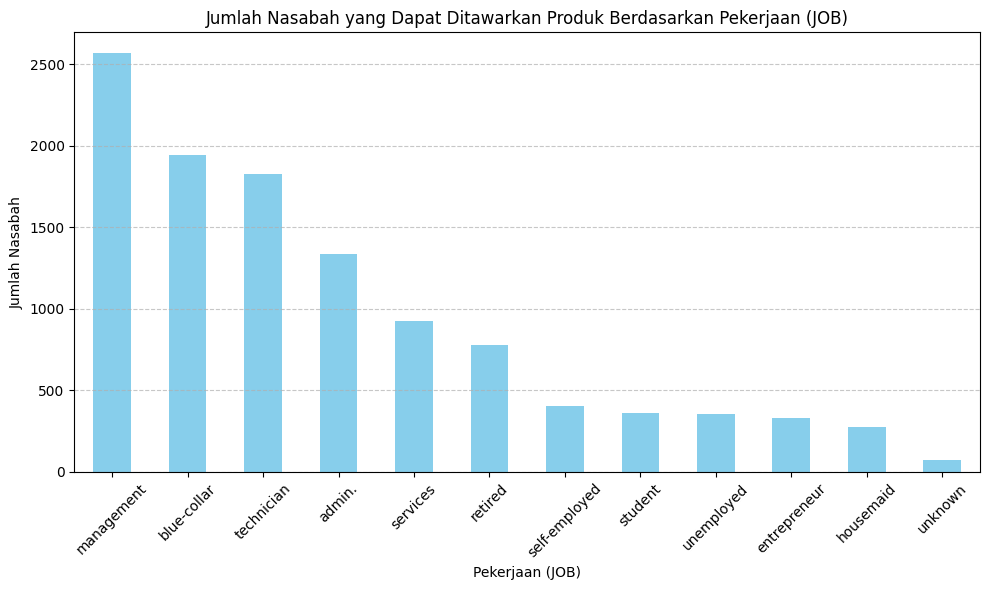

In [16]:
job_counts = df['job'].value_counts()
plt.figure(figsize=(10, 6))
job_counts.plot(kind='bar', color='skyblue')
plt.title('Jumlah Nasabah yang Dapat Ditawarkan Produk Berdasarkan Pekerjaan (JOB)')
plt.xlabel('Pekerjaan (JOB)')
plt.ylabel('Jumlah Nasabah')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

**Marital**

In [17]:
df['marital'].value_counts()

marital
married     6351
single      3518
divorced    1293
Name: count, dtype: int64

In [18]:
df['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

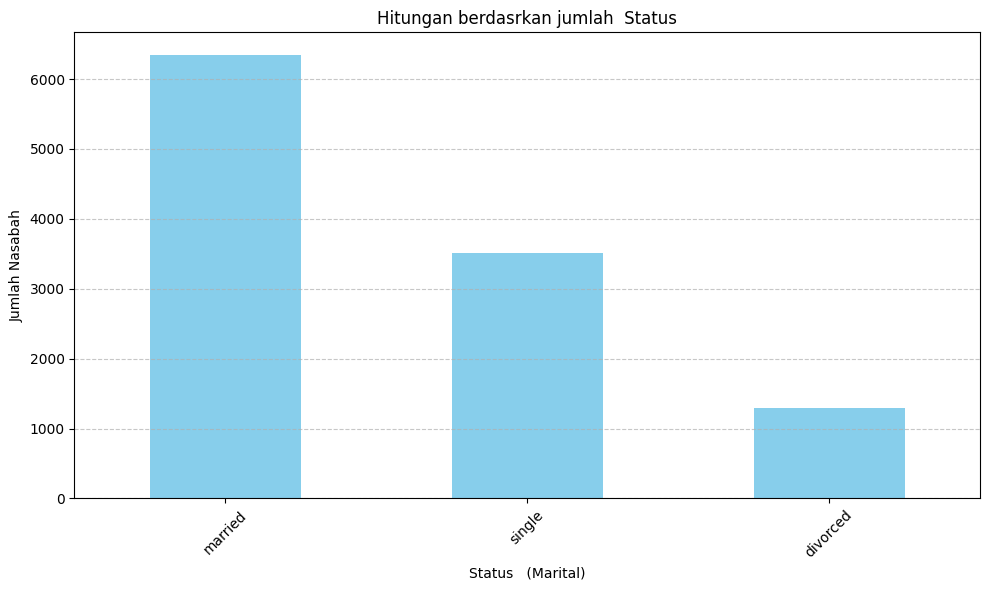

In [19]:
#memvisulisasikan plot marital education
marital_counts=df['marital'].value_counts()
plt.figure(figsize=(10, 6))
marital_counts.plot(kind='bar', color='skyblue')
plt.title('Hitungan berdasrkan jumlah  Status')
plt.xlabel('Status   (Marital)')
plt.ylabel('Jumlah Nasabah')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

**Deposit**

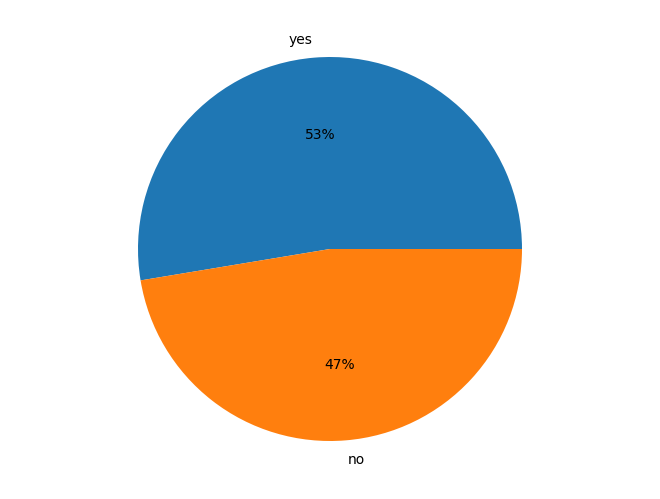

In [20]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.axis('equal')
labels=['yes','no']
y=df.deposit.value_counts()
ax.pie(y, labels=labels, autopct='%.0f%%')
plt.show()

Berdasarkan dari data pie chart diatas didapat ada sekitar 53 % customer memiliki tabungan dan 47 % tidak memiliki tabungan

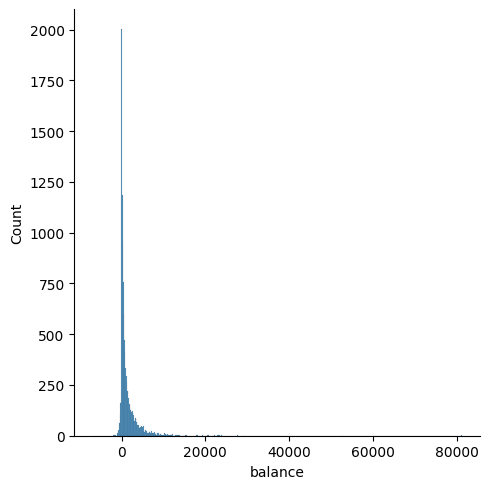

In [21]:
sns.displot(df.balance)

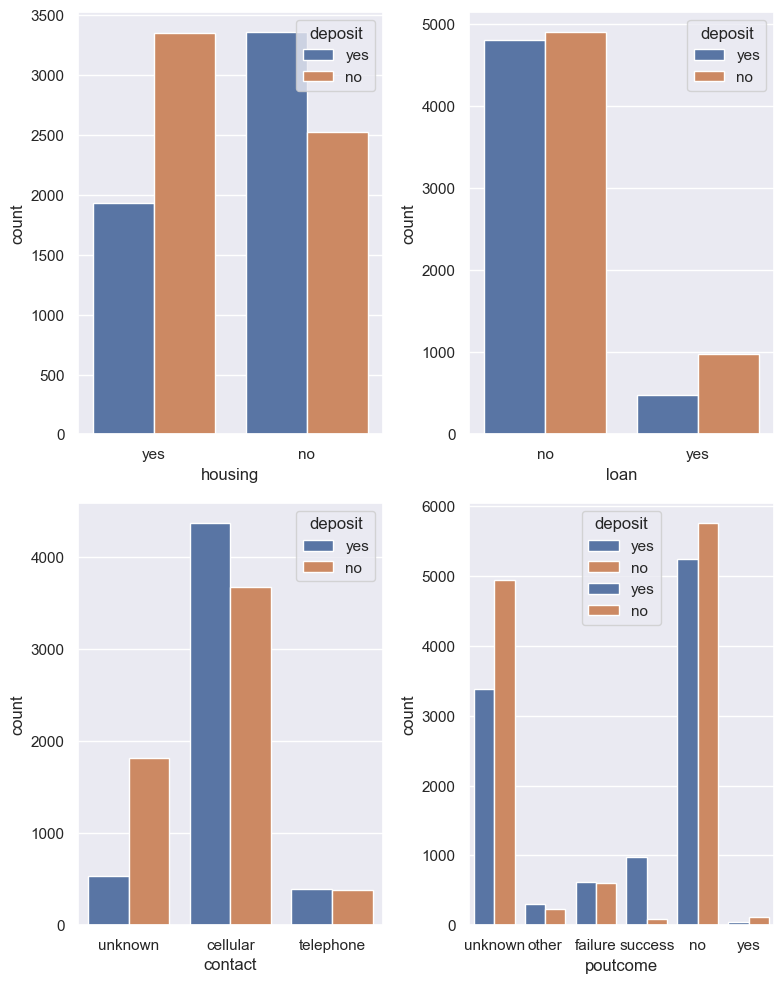

In [22]:
#membuat plot secara bivariat
sns.set(style='darkgrid')
fig,ax=plt.subplots(2,2 , figsize=(8,10))
sns.countplot(data=df,x='housing',hue='deposit', ax=ax[0][0])
sns.countplot(data=df,x='loan',hue='deposit', ax=ax[0][1])
sns.countplot(data=df,x='contact',hue='deposit', ax=ax[1][0])
sns.countplot(data=df,x='poutcome',hue='deposit', ax=ax[1][1])
sns.countplot(data=df,x='default',hue='deposit', ax=ax[1][1])
plt.tight_layout()
plt.show()

**Membuat mplot loan, contact, housing dengan pembanding deposit**

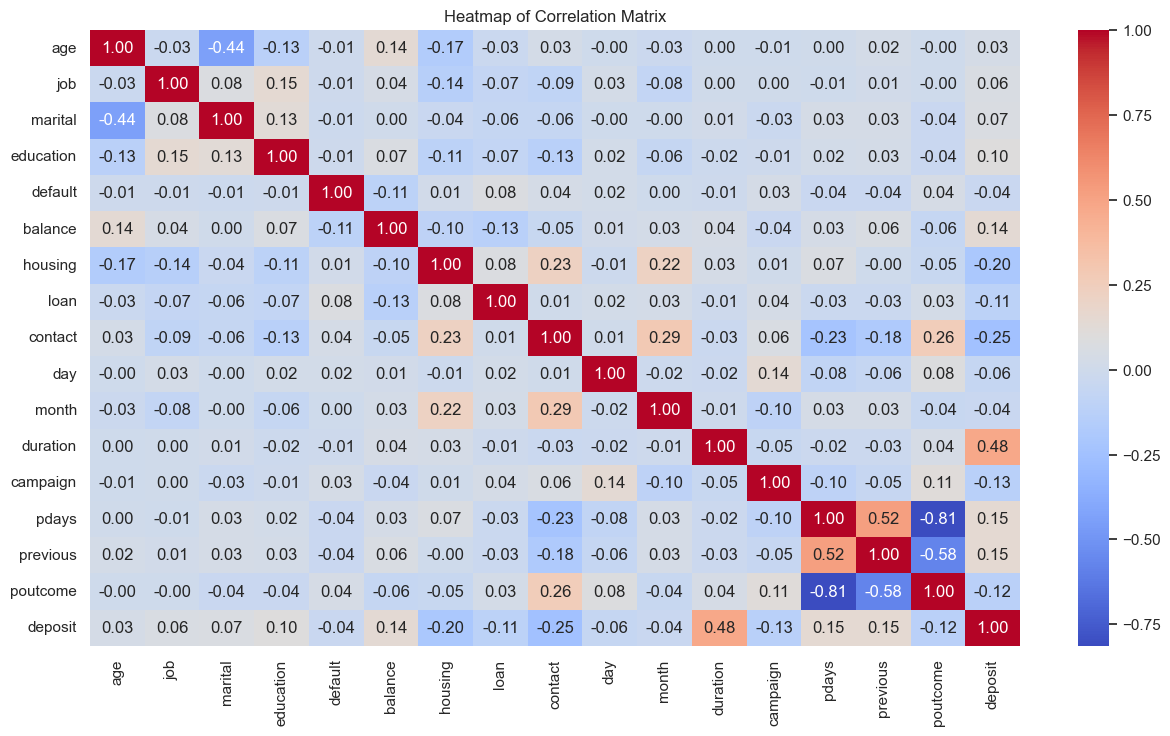

In [23]:
categorical_columns = df
for column in categorical_columns:
    df[column] = pd.Categorical(df[column]).codes
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()



In [24]:
class_counts = df['deposit'].value_counts()

# Tampilkan hasil
print("Jumlah sampel di setiap kelas:")
print(class_counts)

# Periksa seimbang atau tidak
if class_counts[0] == class_counts[1]:
    print("Dataset seimbang.")
else:
    print("Dataset tidak seimbang.")

Jumlah sampel di setiap kelas:
deposit
0    5873
1    5289
Name: count, dtype: int64
Dataset tidak seimbang.


## Clean Data | Membersihkan Data

**Menghapus kolom education , default,marital**

In [25]:
cleaned_df =df.drop (columns=['education','default','marital'],axis=1)
print(cleaned_df)

       age  job  balance  housing  loan  contact  day  month  duration  \
0       41    0     2288        1     0        2    4      8      1021   
1       38    0      469        0     0        2    4      8      1283   
2       23    9     1618        1     0        2    4      8      1246   
3       37    7     2356        1     0        2    4      8       577   
4       36    0      608        0     0        2    4      8       671   
...    ...  ...      ...      ...   ...      ...  ...    ...       ...   
11157   15    1      425        1     0        0   19      0       255   
11158   21    7     1149        0     0        2   15      6        81   
11159   14    9      453        0     0        0   18      1       154   
11160   25    9      424        0     1        0    7      8         7   
11161   16    9      424        0     0        0    8      5       626   

       campaign  pdays  previous  poutcome  deposit  
0             0      0         0         3        1  
1  

**Mengubah data -1 menjadi nan pada kolum pdays**

*digunakan untuk menghapus data yang berisi nan*

cleaned_df['pdays'].replace(-1, np.nan, inplace=True)
print(cleaned_df['pdays'])

In [26]:
# Menghapus baris yang mengandung nilai NaN
cleaned = cleaned_df.dropna(subset=['pdays'])
print(cleaned['pdays'])


0          0
1          0
2          0
3          0
4          0
        ... 
11157      0
11158      0
11159      0
11160    155
11161      0
Name: pdays, Length: 11162, dtype: int16


# Model Training | Pelatihan Model

**Label Encoder**

mengubah data non numerik pada kolum kedalam bentuk data numerik menggunakan labelEncoder

In [27]:
#Buat instance dari LabelEncoder
for column in cleaned.columns:
    if cleaned[column].dtype== np.number:continue
    cleaned[column]=LabelEncoder().fit_transform(cleaned[column])
    print(cleaned)


       age  job  balance  housing  loan  contact  day  month  duration  \
0       41    0     2288        1     0        2    4      8      1021   
1       38    0      469        0     0        2    4      8      1283   
2       23    9     1618        1     0        2    4      8      1246   
3       37    7     2356        1     0        2    4      8       577   
4       36    0      608        0     0        2    4      8       671   
...    ...  ...      ...      ...   ...      ...  ...    ...       ...   
11157   15    1      425        1     0        0   19      0       255   
11158   21    7     1149        0     0        2   15      6        81   
11159   14    9      453        0     0        0   18      1       154   
11160   25    9      424        0     1        0    7      8         7   
11161   16    9      424        0     0        0    8      5       626   

       campaign  pdays  previous  poutcome  deposit  
0             0      0         0         3        1  
1  

C:\Users\USER\AppData\Local\Temp\ipykernel_9172\1249736058.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if cleaned[column].dtype== np.number:continue
C:\Users\USER\AppData\Local\Temp\ipykernel_9172\1249736058.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if cleaned[column].dtype== np.number:continue
C:\Users\USER\AppData\Local\Temp\ipykernel_9172\1249736058.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if cleaned[column].dtype== np.number:continue
C:\Users\USER\AppData\Local\Temp\ipykernel_9172\1249736058.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly corre

In [28]:
# mendefinisikan features (X) and the target (y)
X = cleaned.drop('deposit', axis=1)
y = cleaned['deposit']

# Memisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("baris utama  x_train",X_train.shape,' dengan jumlah baris dan kolom ',y_train.shape)
print('presentasi targeted di data training :  ')
print(y_train.value_counts(normalize=True))
print("\nbaris utama  x_test",X_test.shape,' dengan jumlah baris dan kolom ',y_test.shape)
print('presentasi targeted di data training :  ')
print(y_test.value_counts(normalize=True))

baris utama  x_train (8929, 13)  dengan jumlah baris dan kolom  (8929,)
presentasi targeted di data training :  
deposit
0    0.527159
1    0.472841
Name: proportion, dtype: float64

baris utama  x_test (2233, 13)  dengan jumlah baris dan kolom  (2233,)
presentasi targeted di data training :  
deposit
0    0.522167
1    0.477833
Name: proportion, dtype: float64


**LogisticRegression**

In [29]:
log_model = LogisticRegression(random_state=42)
log_model.fit(X_train, y_train)

c:\Users\USER\.conda\envs\streamlitenv\Lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

**Random Forest**

In [30]:
rand_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10) 
rand_model.fit(X_train, y_train) 


RandomForestClassifier(max_depth=10, random_state=42)

**SVM**

In [31]:
SV_model = SVC(random_state=42)
SV_model .fit(X_train,y_train)

SVC(random_state=42)

**Naive Bayes**

In [32]:
#Mengevaluasi  naive bayes
NB_model = GaussianNB()
NB_model.fit(X_train,y_train)

GaussianNB()

**KNN**

In [33]:
#Mengevaluasi  KNN
neig = KNeighborsClassifier()
neig.fit(X_train,y_train)

KNeighborsClassifier()

**DecisionTree**

In [34]:
#Mengevaluasi  KNN
clf= DecisionTreeClassifier(random_state=42, max_depth=10)
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

# Model Evaluation | Evaluasi Model

**Logistic Regression**

In [35]:
#Mengevaluasi data train Logistic regression
y_train_pred = log_model.predict(X_train)

#Membuat Laporan Matriks kebingungan
print('Laporan Confusion Model Evaluation Logic Regression: ')
print(confusion_matrix(y_train,y_train_pred))

#Membuat Laporan Klasifikasi Model
print('\nLaporan Klasifikasi Model Evaluation Logic Regression: ')
print(classification_report(y_train,y_train_pred))

Laporan Confusion Model Evaluation Logic Regression: 
[[3757  950]
 [1173 3049]]

Laporan Klasifikasi Model Evaluation Logic Regression: 
              precision    recall  f1-score   support

           0       0.76      0.80      0.78      4707
           1       0.76      0.72      0.74      4222

    accuracy                           0.76      8929
   macro avg       0.76      0.76      0.76      8929
weighted avg       0.76      0.76      0.76      8929



In [36]:
#Mengevaluasi model data test Logistic regression
y_test_pred = log_model.predict(X_test)

#Membuat laporan matriks kebingungan
print('Laporan Klasifikasi Model Evaluation Logic Regression: ')
print(confusion_matrix(y_test,y_test_pred))

#Membuat Laporan klasifikasi Model
print('\nLaporan Klasifikasi Model Evaluation Logic Regression: ')
print(classification_report(y_test,y_test_pred))

Laporan Klasifikasi Model Evaluation Logic Regression: 
[[899 267]
 [289 778]]

Laporan Klasifikasi Model Evaluation Logic Regression: 
              precision    recall  f1-score   support

           0       0.76      0.77      0.76      1166
           1       0.74      0.73      0.74      1067

    accuracy                           0.75      2233
   macro avg       0.75      0.75      0.75      2233
weighted avg       0.75      0.75      0.75      2233



Membuat visualisasi dari data Train dan data Test

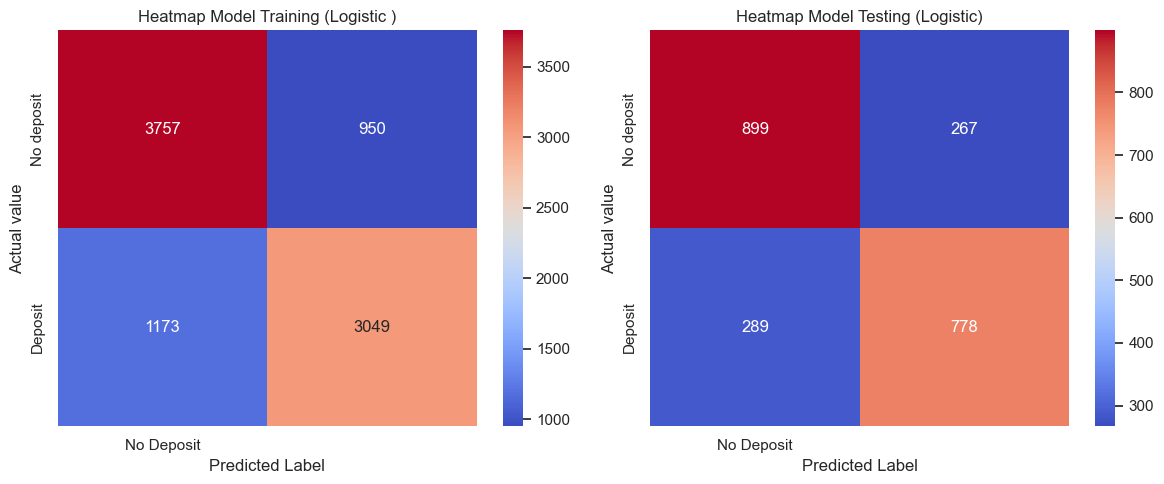

In [37]:
# Memvisualisasikan confusion matrix pada data latih
Confusion_matrix_df=pd.DataFrame((confusion_matrix(y_train,y_train_pred)),
                    ('No deposit','Deposit'),('No Deposit',''))
plt.figure(figsize=(12, 5))

# Plot pertama (data latih)
plt.subplot(1, 2, 1)
heatmap = sns.heatmap(Confusion_matrix_df, annot=True, annot_kws={'size': 12}, fmt='d', cmap='coolwarm')
heatmap.set_title('Heatmap Model Training (Logistic )')
heatmap.set_ylabel('Actual value')
heatmap.set_xlabel('Predicted Label')

# Menghitung dan mencetak confusion matrix pada data uji
Confusion_matrix_df2 = pd.DataFrame((confusion_matrix(y_test,y_test_pred)),
                    ('No deposit','Deposit'),('No Deposit',''))

# Plot kedua (data uji)
plt.subplot(1, 2, 2)
heatmap = sns.heatmap(Confusion_matrix_df2, annot=True, annot_kws={'size': 12}, fmt='d', cmap='coolwarm')
heatmap.set_title('Heatmap Model Testing (Logistic)')
heatmap.set_ylabel('Actual value')
heatmap.set_xlabel('Predicted Label')

# Menampilkan plot
plt.tight_layout()
plt.show()

**Random Forest**

In [38]:
#menampilkan hasil training random forest
y_train_pred = rand_model.predict(X_train)

#Laporan confusion Matrix
print('Laporan Klasifikasi Training Model Evaluation Random Forest: ')
print(confusion_matrix(y_train,y_train_pred))

#Laporan klasifikasi 
print('\nLaporan Klasifikasi Training Model Evaluation Random Forest: ')
print(classification_report(y_train,y_train_pred))

Laporan Klasifikasi Training Model Evaluation Random Forest: 
[[4106  601]
 [ 375 3847]]

Laporan Klasifikasi Training Model Evaluation Random Forest: 
              precision    recall  f1-score   support

           0       0.92      0.87      0.89      4707
           1       0.86      0.91      0.89      4222

    accuracy                           0.89      8929
   macro avg       0.89      0.89      0.89      8929
weighted avg       0.89      0.89      0.89      8929



In [39]:
#menampilkan hasil data Test random forest
y_test_pred = rand_model.predict(X_test)

#Laporan confusion Matrix
print('Laporan Klasifikasi Test Model Evaluation Random Forest: ')
print(confusion_matrix(y_test,y_test_pred))

#Laporan classification Report
print('\nLaporan Klasifikasi Test Model Evaluation Random Forest: ')
print(classification_report(y_test,y_test_pred))

Laporan Klasifikasi Test Model Evaluation Random Forest: 
[[938 228]
 [155 912]]

Laporan Klasifikasi Test Model Evaluation Random Forest: 
              precision    recall  f1-score   support

           0       0.86      0.80      0.83      1166
           1       0.80      0.85      0.83      1067

    accuracy                           0.83      2233
   macro avg       0.83      0.83      0.83      2233
weighted avg       0.83      0.83      0.83      2233



Memvisualisasikan confusion Matrix ke heatmap

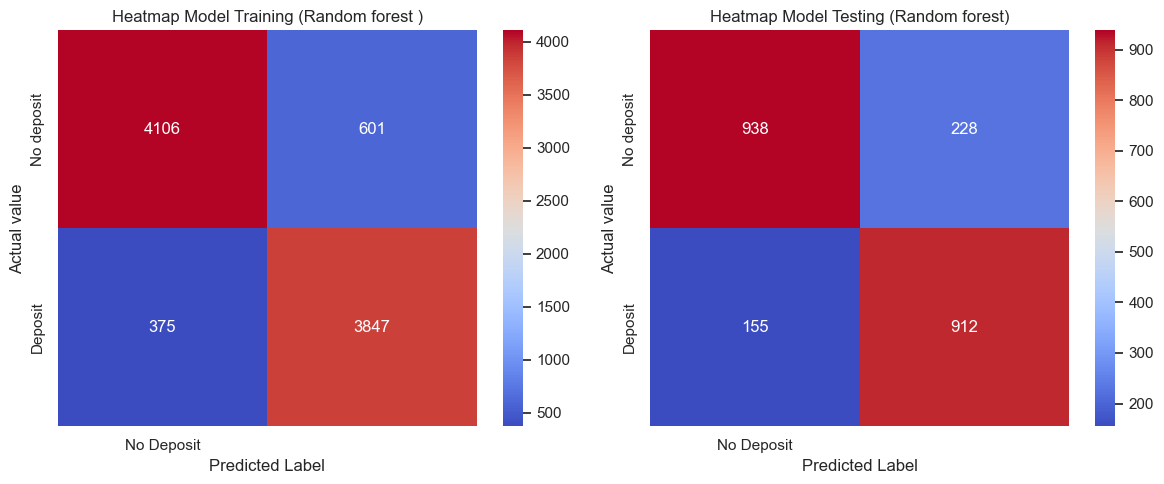

In [40]:
# Memvisualisasikan confusion matrix pada data latih
Confusion_matrix_df=pd.DataFrame((confusion_matrix(y_train,y_train_pred)),
                    ('No deposit','Deposit'),('No Deposit',''))
plt.figure(figsize=(12, 5))

# Plot pertama (data latih)
plt.subplot(1, 2, 1)
heatmap = sns.heatmap(Confusion_matrix_df, annot=True, annot_kws={'size': 12}, fmt='d', cmap='coolwarm')
heatmap.set_title('Heatmap Model Training (Random forest )')
heatmap.set_ylabel('Actual value')
heatmap.set_xlabel('Predicted Label')

# Menghitung dan mencetak confusion matrix pada data uji
Confusion_matrix_df2 = pd.DataFrame((confusion_matrix(y_test,y_test_pred)),
                    ('No deposit','Deposit'),('No Deposit',''))

# Plot kedua (data uji)
plt.subplot(1, 2, 2)
heatmap = sns.heatmap(Confusion_matrix_df2, annot=True, annot_kws={'size': 12}, fmt='d', cmap='coolwarm')
heatmap.set_title('Heatmap Model Testing (Random forest)')
heatmap.set_ylabel('Actual value')
heatmap.set_xlabel('Predicted Label')

# Menampilkan plot
plt.tight_layout()
plt.show()

**Evaluasi Model SVM**

In [41]:
#Mengevaluasi SVM
y_train_pred =SV_model.predict(X_train)

#Laporan confusion Matrix
print('Laporan Klasifikasi Train Model Evaluation SVM: ')
print(confusion_matrix(y_train,y_train_pred))

#Laporan Klasifikasi
print('\nLaporan Klasifikasi Model Evaluation SVM: ')
print(classification_report(y_train,y_train_pred))

Laporan Klasifikasi Train Model Evaluation SVM: 
[[3792  915]
 [1322 2900]]

Laporan Klasifikasi Model Evaluation SVM: 
              precision    recall  f1-score   support

           0       0.74      0.81      0.77      4707
           1       0.76      0.69      0.72      4222

    accuracy                           0.75      8929
   macro avg       0.75      0.75      0.75      8929
weighted avg       0.75      0.75      0.75      8929



In [42]:
#Mengevaluasi SVM
SV_model = SVC().fit(X_train,y_train)
y_test_pred =SV_model.predict(X_test)

#Laporan confusion Matrix
print('Laporan Klasifikasi Test Model Evaluation SVM: ')
print(confusion_matrix(y_test,y_test_pred))

#Laporan Klasifikasi Model SVM
print('\nLaporan Klasifikasi Model Evaluation SVM: ')
print(classification_report(y_test,y_test_pred))

Laporan Klasifikasi Test Model Evaluation SVM: 
[[908 258]
 [321 746]]

Laporan Klasifikasi Model Evaluation SVM: 
              precision    recall  f1-score   support

           0       0.74      0.78      0.76      1166
           1       0.74      0.70      0.72      1067

    accuracy                           0.74      2233
   macro avg       0.74      0.74      0.74      2233
weighted avg       0.74      0.74      0.74      2233



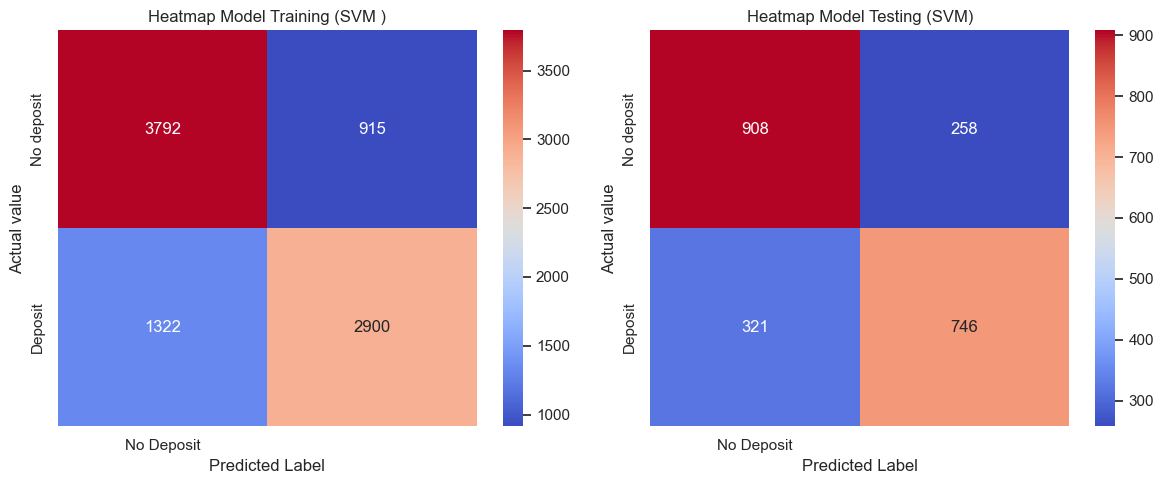

In [43]:
# Memvisualisasikan confusion matrix pada data latih
Confusion_matrix_df=pd.DataFrame((confusion_matrix(y_train,y_train_pred)),
                    ('No deposit','Deposit'),('No Deposit',''))
plt.figure(figsize=(12, 5))

# Plot pertama (data latih)
plt.subplot(1, 2, 1)
heatmap = sns.heatmap(Confusion_matrix_df, annot=True, annot_kws={'size': 12}, fmt='d', cmap='coolwarm')
heatmap.set_title('Heatmap Model Training (SVM )')
heatmap.set_ylabel('Actual value')
heatmap.set_xlabel('Predicted Label')

# Menghitung dan mencetak confusion matrix pada data uji
Confusion_matrix_df2 = pd.DataFrame((confusion_matrix(y_test,y_test_pred)),
                    ('No deposit','Deposit'),('No Deposit',''))

# Plot kedua (data uji)
plt.subplot(1, 2, 2)
heatmap = sns.heatmap(Confusion_matrix_df2, annot=True, annot_kws={'size': 12}, fmt='d', cmap='coolwarm')
heatmap.set_title('Heatmap Model Testing (SVM)')
heatmap.set_ylabel('Actual value')
heatmap.set_xlabel('Predicted Label')

# Menampilkan plot
plt.tight_layout()
plt.show()

 **Evaluasi Naive Bayes**

In [44]:
y_train_pred_nb =NB_model.predict(X_train)

#Laporan confusion Matrix
print('Laporan Klasifikasi Train Model Evaluation Naive Bayes: ')
print(confusion_matrix(y_train,y_train_pred))

#Laporan klasifikasi Naive Bayes
print('\nLaporan Klasifikasi Model Evaluation Naive Bayes: ')
print(classification_report(y_train,y_train_pred_nb))

Laporan Klasifikasi Train Model Evaluation Naive Bayes: 
[[3792  915]
 [1322 2900]]

Laporan Klasifikasi Model Evaluation Naive Bayes: 
              precision    recall  f1-score   support

           0       0.79      0.75      0.77      4707
           1       0.74      0.77      0.75      4222

    accuracy                           0.76      8929
   macro avg       0.76      0.76      0.76      8929
weighted avg       0.76      0.76      0.76      8929



In [45]:
y_test_pred_nb =NB_model.predict(X_test)

#Laporan confusion Matrix
print('Laporan Klasifikasi Test Model Evaluation Naive Bayes: ')
print(confusion_matrix(y_test,y_test_pred))

#Laporan klasifikasi 
print('\nLaporan Klasifikasi Model Evaluation Naive Bayes: ')
print(classification_report(y_test,y_test_pred_nb))

Laporan Klasifikasi Test Model Evaluation Naive Bayes: 
[[908 258]
 [321 746]]

Laporan Klasifikasi Model Evaluation Naive Bayes: 
              precision    recall  f1-score   support

           0       0.79      0.74      0.77      1166
           1       0.74      0.78      0.76      1067

    accuracy                           0.76      2233
   macro avg       0.76      0.76      0.76      2233
weighted avg       0.76      0.76      0.76      2233



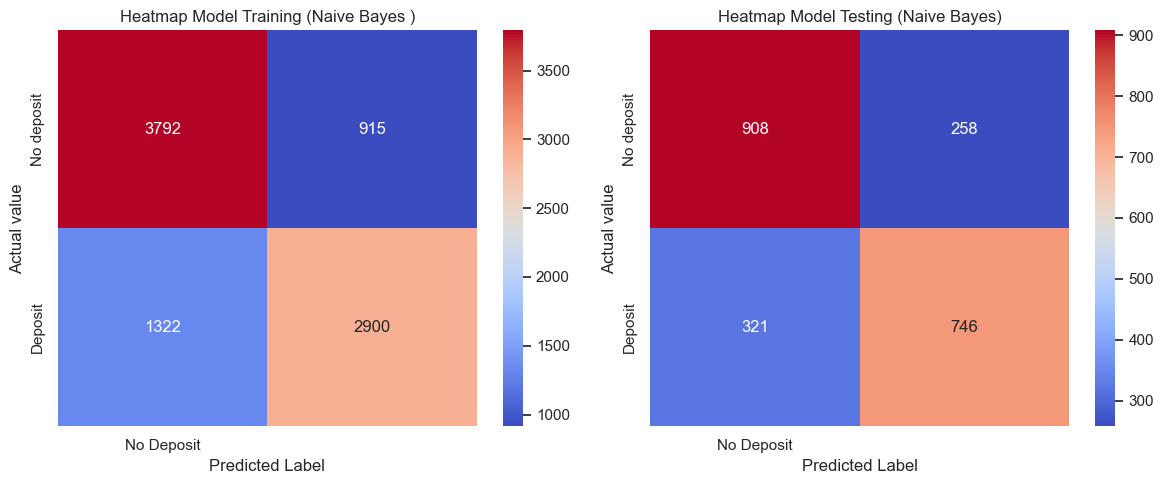

In [46]:
# Memvisualisasikan confusion matrix pada data latih
Confusion_matrix_df=pd.DataFrame((confusion_matrix(y_train,y_train_pred)),
                    ('No deposit','Deposit'),('No Deposit',''))
plt.figure(figsize=(12, 5))

# Plot pertama (data latih)
plt.subplot(1, 2, 1)
heatmap = sns.heatmap(Confusion_matrix_df, annot=True, annot_kws={'size': 12}, fmt='d', cmap='coolwarm')
heatmap.set_title('Heatmap Model Training (Naive Bayes )')
heatmap.set_ylabel('Actual value')
heatmap.set_xlabel('Predicted Label')

# Menghitung dan mencetak confusion matrix pada data uji
Confusion_matrix_df2 = pd.DataFrame((confusion_matrix(y_test,y_test_pred)),
                    ('No deposit','Deposit'),('No Deposit',''))

# Plot kedua (data uji)
plt.subplot(1, 2, 2)
heatmap = sns.heatmap(Confusion_matrix_df2, annot=True, annot_kws={'size': 12}, fmt='d', cmap='coolwarm')
heatmap.set_title('Heatmap Model Testing (Naive Bayes)')
heatmap.set_ylabel('Actual value')
heatmap.set_xlabel('Predicted Label')

# Menampilkan plot
plt.tight_layout()
plt.show()

**KNN**

In [47]:
y_train_pred =neig.predict(X_train)
#Laporan confusion Matrix
print('Laporan Klasifikasi Train Model Evaluation KNN: ')
print(confusion_matrix(y_train,y_train_pred))

#Laporan Klasifikasi KNN
print('\nLaporan Klasifikasi Model Evaluation KNN: ')
print(classification_report(y_train,y_train_pred))

Laporan Klasifikasi Train Model Evaluation KNN: 
[[3944  763]
 [ 851 3371]]

Laporan Klasifikasi Model Evaluation KNN: 
              precision    recall  f1-score   support

           0       0.82      0.84      0.83      4707
           1       0.82      0.80      0.81      4222

    accuracy                           0.82      8929
   macro avg       0.82      0.82      0.82      8929
weighted avg       0.82      0.82      0.82      8929



In [48]:
y_test_pred =neig.predict(X_test)

#Laporan confusion Matrix
print('Laporan Klasifikasi Test Model Evaluation knn: ')
print(confusion_matrix(y_test,y_test_pred))

#Laporan Klasifikasi
print('\nLaporan Klasifikasi Model KNN: ')
print(classification_report(y_test,y_test_pred))

Laporan Klasifikasi Test Model Evaluation knn: 
[[904 262]
 [293 774]]

Laporan Klasifikasi Model KNN: 
              precision    recall  f1-score   support

           0       0.76      0.78      0.77      1166
           1       0.75      0.73      0.74      1067

    accuracy                           0.75      2233
   macro avg       0.75      0.75      0.75      2233
weighted avg       0.75      0.75      0.75      2233



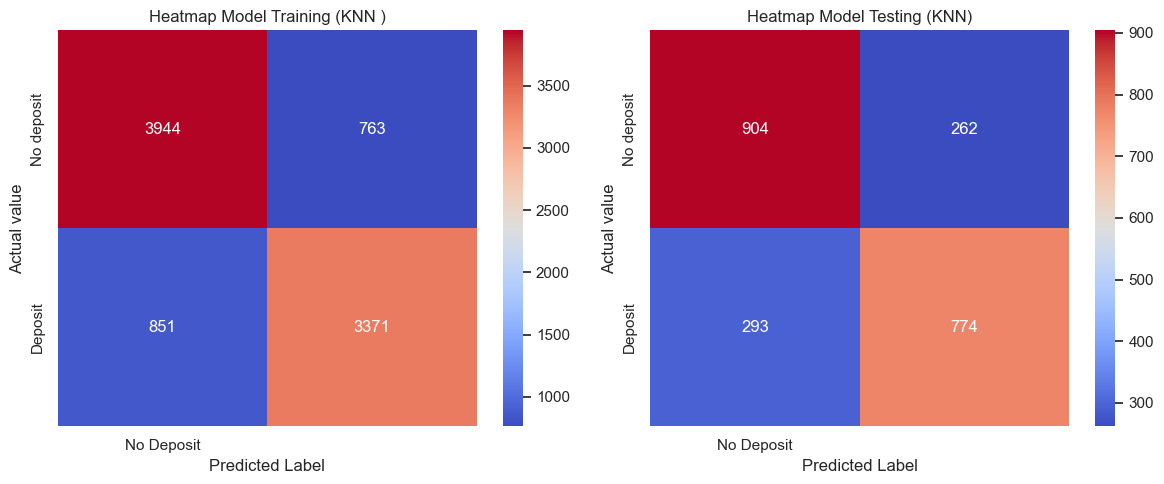

In [49]:
# Memvisualisasikan confusion matrix pada data latih
Confusion_matrix_df=pd.DataFrame((confusion_matrix(y_train,y_train_pred)),
                    ('No deposit','Deposit'),('No Deposit',''))
plt.figure(figsize=(12, 5))

# Plot pertama (data latih)
plt.subplot(1, 2, 1)
heatmap = sns.heatmap(Confusion_matrix_df, annot=True, annot_kws={'size': 12}, fmt='d', cmap='coolwarm')
heatmap.set_title('Heatmap Model Training (KNN )')
heatmap.set_ylabel('Actual value')
heatmap.set_xlabel('Predicted Label')

# Menghitung dan mencetak confusion matrix pada data uji
Confusion_matrix_df2 = pd.DataFrame((confusion_matrix(y_test,y_test_pred)),
                    ('No deposit','Deposit'),('No Deposit',''))

# Plot kedua (data uji)
plt.subplot(1, 2, 2)
heatmap = sns.heatmap(Confusion_matrix_df2, annot=True, annot_kws={'size': 12}, fmt='d', cmap='coolwarm')
heatmap.set_title('Heatmap Model Testing (KNN)')
heatmap.set_ylabel('Actual value')
heatmap.set_xlabel('Predicted Label')

# Menampilkan plot
plt.tight_layout()
plt.show()

**Descision Tree**

In [50]:
y_train_pred =clf.predict(X_train)
#Laporan confusion Matrix
print('Laporan Klasifikasi Train Model Evaluation KNN: ')
print(confusion_matrix(y_train,y_train_pred))

#Laporan Klasifikasi KNN
print('\nLaporan Klasifikasi Model Evaluation KNN: ')
print(classification_report(y_train,y_train_pred))

Laporan Klasifikasi Train Model Evaluation KNN: 
[[4103  604]
 [ 384 3838]]

Laporan Klasifikasi Model Evaluation KNN: 
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      4707
           1       0.86      0.91      0.89      4222

    accuracy                           0.89      8929
   macro avg       0.89      0.89      0.89      8929
weighted avg       0.89      0.89      0.89      8929



In [51]:
y_test_pred =clf.predict(X_test)

#Laporan confusion Matrix
print('Laporan Klasifikasi Test Model Evaluation Decision Tree: ')
print(confusion_matrix(y_test,y_test_pred))

#Laporan Klasifikasi
print('\nLaporan Klasifikasi Model Dscision Tree: ')
print(classification_report(y_test,y_test_pred))

Laporan Klasifikasi Test Model Evaluation Decision Tree: 
[[937 229]
 [190 877]]

Laporan Klasifikasi Model Dscision Tree: 
              precision    recall  f1-score   support

           0       0.83      0.80      0.82      1166
           1       0.79      0.82      0.81      1067

    accuracy                           0.81      2233
   macro avg       0.81      0.81      0.81      2233
weighted avg       0.81      0.81      0.81      2233



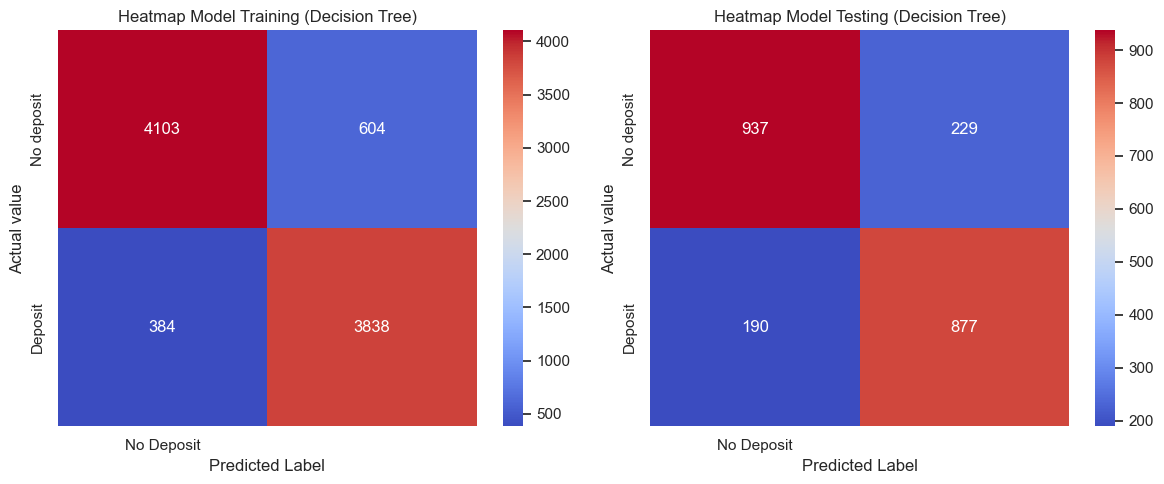

In [52]:
# Memvisualisasikan confusion matrix pada data latih
Confusion_matrix_df=pd.DataFrame((confusion_matrix(y_train,y_train_pred)),
                    ('No deposit','Deposit'),('No Deposit',''))
plt.figure(figsize=(12, 5))

# Plot pertama (data latih)
plt.subplot(1, 2, 1)
heatmap = sns.heatmap(Confusion_matrix_df, annot=True, annot_kws={'size': 12}, fmt='d', cmap='coolwarm')
heatmap.set_title('Heatmap Model Training (Decision Tree)')
heatmap.set_ylabel('Actual value')
heatmap.set_xlabel('Predicted Label')

# Menghitung dan mencetak confusion matrix pada data uji
Confusion_matrix_df2 = pd.DataFrame((confusion_matrix(y_test,y_test_pred)),
                    ('No deposit','Deposit'),('No Deposit',''))

# Plot kedua (data uji)
plt.subplot(1, 2, 2)
heatmap = sns.heatmap(Confusion_matrix_df2, annot=True, annot_kws={'size': 12}, fmt='d', cmap='coolwarm')
heatmap.set_title('Heatmap Model Testing (Decision Tree)')
heatmap.set_ylabel('Actual value')
heatmap.set_xlabel('Predicted Label')

# Menampilkan plot
plt.tight_layout()
plt.show()

## Model Selection | Pemilihan Model

 Berdasarkan hasil evaluasi yang telah dilakukan ,model Random Forest terpilih karena menunjukkan kinerja yang baik. Nilai akurasi pada data pelatihan (train) mencapai 0.89, sedangkan pada data pengujian (test) mencapai 0.83 menunjukkan kemampuan model untuk  data train dan data test dengan baik. Selain itu, model ini menunjukkan keseimbangan antara presisi dan recall, serta nilai F1-score yang konsisten dan baik, 

**RandomizedSearchCV**

Digunakan untuk mencoba memodelkan random forest menggunakan RandomizedSearchCV  untuk mencari kombinasi parameter yang optimal secara acak dalam ruang parameter yang telah ditentukan. 

In [53]:
# Definisikan random parameter yang akan diuji dari random forest
param_grid = {
    'n_estimators': [100, 200, 300],  # Jumlah pohon dalam ensemble
    'max_depth': [None, 10, 20],  # Kedalaman maksimum pohon
    'min_samples_split': [2, 5, 10],  # Jumlah sampel minimum yang diperlukan untuk membagi node
    'min_samples_leaf': [1, 2, 4],  # Jumlah sampel minimum yang diperlukan di setiap leaf node
}

# Lakukan pencarian acak dengan cross-validation
random_search = RandomizedSearchCV(rand_model, param_distributions=param_grid, n_iter=10, cv=5)
random_search.fit(X_train, y_train)

# Evaluasi model terpilih
print("Best parameters:", random_search.best_params_)
print("Best cross-validation score: {:.2f}".format(random_search.best_score_))

# Pengujian pada set pengujian terpisah
print("Test set score: {:.2f}".format(random_search.score(X_test, y_test)))

Best parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20}
Best cross-validation score: 0.85
Test set score: 0.84


**Feature selection**

Feature ranking:
1. feature 8 (0.478922)
2. feature 7 (0.078449)
3. feature 5 (0.063415)
4. feature 10 (0.060274)
5. feature 0 (0.055635)
6. feature 12 (0.051827)
7. feature 2 (0.051216)
8. feature 3 (0.043263)
9. feature 6 (0.039118)
10. feature 11 (0.027003)
11. feature 9 (0.022811)
12. feature 1 (0.019353)
13. feature 4 (0.008714)


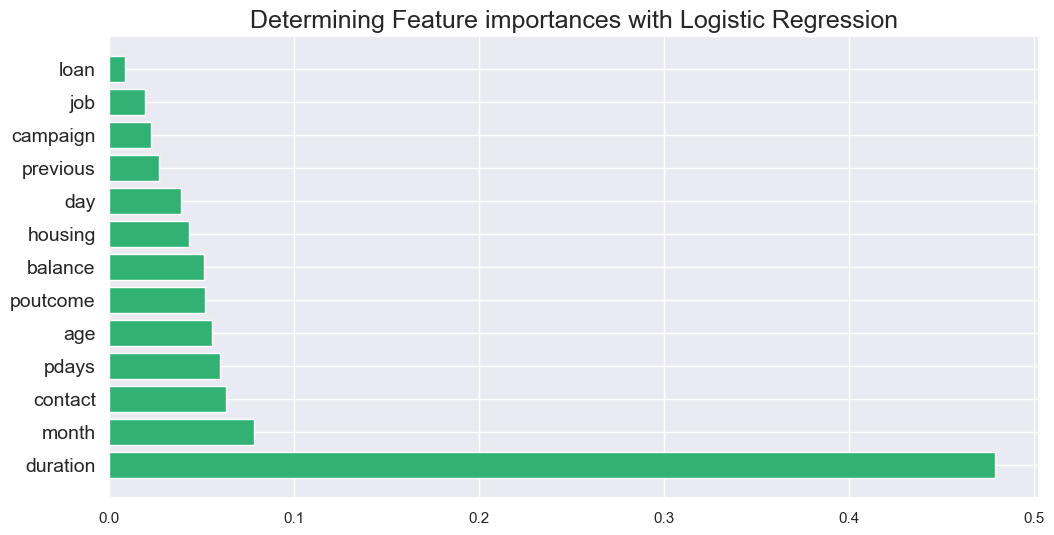

In [54]:
importances = rand_model.feature_importances_
feature_names =  cleaned_df.drop('deposit', axis=1).columns
indices = np.argsort(importances)[::-1]

# Print feature berdasarkan ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances
plt.figure(figsize=(12, 6))
plt.title("Determining Feature importances with Logistic Regression", fontsize=18)
plt.barh(range(len(indices)), importances[indices], color='#31B173', align="center")
plt.yticks(range(len(indices)), feature_names[indices], rotation='horizontal', fontsize=14)
plt.ylim([-1, len(indices)])
plt.show()


## Conclusion | Kesimpulan

 
**Berdasarkan hasil analisis diatas untuk memprediksi segmentasi customer berdasarkan deposit**
1. Dari pie chart yang disajikan dalam visualisasi data, terlihat bahwa sebanyak 53% dari pengguna memiliki deposit, sedangkan 47% tidak memiliki deposit.

2. Evaluasi model menunjukkan hasil sebagai berikut:
 - laporan klasifikasi untuk beberapa model yang telah dievaluasi:
   - Model Logistic Regression menunjukkan tingkat akurasi sebesar 0.76 untuk data pelatihan dan data pengujian.
   - Model Random Forest mencapai tingkat akurasi sebesar 0.89 untuk data pelatihan dan 0.83 untuk data pengujian.
   - Model Support Vector Machine (SVM) menunjukkan tingkat akurasi sebesar 0.75 untuk data pelatihan dan 0.74 untuk data pengujian.
   - Model Naive Bayes menunjukkan tingkat akurasi sebesar 0.76 untuk data pelatihan dan 0.76 untuk data pengujian.
   - Model K-Nearest Neighbors (KNN) menunjukkan tingkat akurasi sebesar 0.82 untuk data pelatihan dan 0.75 untuk data pengujian.
   - Model Decision Tree menunjukkan tingkat akurasi sebesar 0.89 untuk data pelatihan dan 0.81 untuk data pengujian.
 - Dari hasil evalusi ini dapat disimpulkan model Random Forest menjadi pilihan yang baik untuk memprediksi segmentasi pelanggan berdasarkan deposit dengan akurasi yang tinggi.

3. Hasil pemilihan model dilakukan dengan menggunakan
  RandomizedSearch untuk optimasi model, yang menghasilkan skor cross-validation terbaik sebesar 0.85 dan skor uji sebesar 0.83. Terdapat peringkat fitur yang menunjukkan pentingnya masing-masing fitur dalam model, dengan fitur ke-8 memiliki bobot tertinggi sebesar 0.478922, diikuti oleh fitur ke-7 dengan bobot 0.078449, dan seterusnya.

**Save model**

In [55]:
from joblib import dump

# Simpan semua model ke dalam satu objek
models = {
    'Logistic Regression':log_model,
    'Random Forest': rand_model,
    'SVM': SV_model,
    'Naive Bayes': NB_model,
    'KNN':neig,
    'Decision Tree': clf,
}

# Simpan objek yang berisi semua model
dump(models, 'allmodels.joblib')

['allmodels.joblib']